# DCEで変換した音源に対してTDAを行う

In [3]:
# import module
import pyper
import matplotlib.pyplot as plt
import numpy as np

from chaos import embedding_phase_space

In [4]:
# define variables
FILE = "../samplevoice/arigato_yama-rei16k.wav"
SIZE = 256
OUT = "./vis_tda/"
DIM = 2

### TDA関数の定義

In [5]:
def tda(data, is_df=False):
    r = pyper.R()
    r("library(TDA)")
    r.assign("data", data)
    print(r("is.vector(data)"))
    r("Diag_Cir <- ripsDiag(X = data, maxdimension =1, maxscale = 5)")
    
    # よくわからん
    r("dimension_Cir <- Diag_Cir$diagram[, 1]")
    r("birth_Cir <- Diag_Cir$diagram[, 2]")
    r("death_Cir <- Diag_Cir$diagram[, 3]")
    r("Diag_Cir_DF <- data.frame(cbind(Dimension = dimension_Cir, Birth = birth_Cir, Death = death_Cir))")
    res = r.get("Diag_Cir_DF")
    if not is_df:
        res = np.array(res)
    return res

### Test

In [10]:
embedding, name = embedding_phase_space(FILE, SIZE, DIM)
print(type(embedding))
print(embedding.shape)
print(type(data))
print(data.shape)

file name: arigato_yama-rei16k
delay time: 2
embedding shape: (255, 2)
<type 'numpy.ndarray'>
(255, 2)
<type 'numpy.ndarray'>
(150, 2)


In [16]:
data = np.load("data.npy")
print(data.shape)
print(type(data))
res = tda(data)
dimension, birth, death = res[:, 0], res[:, 1], res[:, 2]

(150, 2)
<type 'numpy.ndarray'>
try({is.vector(data)})
[1] FALSE



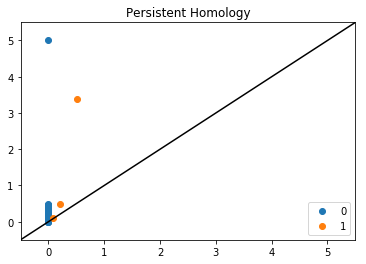

In [17]:
%matplotlib inline
plt.title("Persistent Homology")
plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.plot([-0.5, 5.5], [-0.5, 5.5], color='black')

dim_0 = np.where(dimension == 0)
dim_1 = np.where(dimension == 1)
birth_0, birth_1 = birth[dim_0], birth[dim_1]
death_0, death_1 = death[dim_0], death[dim_1]
plt.scatter(birth_0, death_0, label="0")
plt.scatter(birth_1, death_1, label="1")
plt.legend()